In [1]:
import pandas as pd
import numpy as np

In [2]:
health_df = pd.read_csv('Health_Data.csv')

In [3]:
health_df.head()

,age,income,illness,reduced,health
0,0.19,0.55,1,4,1
1,0.19,0.45,1,2,1
2,0.19,0.90,3,0,0
3,0.19,0.15,1,0,0
4,0.19,0.45,2,5,1


In [136]:
X = health_df.iloc[:,:-1]
y = health_df.iloc[:,-1]

In [137]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X),columns=['age','income','illness','reduced'])

In [6]:
b0 = 0
b1 = 0 
b2 = 0
b3 = 0
b4 = 0
alpha = 0.1
num_iter = 10000

x1 = X['age'].values
x2 = X['income'].values
x3 = X['illness'].values
x4 = X['reduced'].values

n = len(y)

for i in range(num_iter):
    y_pred = b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4
    
    err = y - y_pred
    
    b0 = b0 + alpha*np.sum(err)/n
    
    b1 = b1 + alpha*np.sum(err*x1)/n
    b2 = b2 + alpha*np.sum(err*x2)/n
    b3 = b3 + alpha*np.sum(err*x3)/n
    b4 = b4 + alpha*np.sum(err*x4)/n
    
print(b0,b1,b2,b3,b4)



1.2175337186897872 -0.17273499897030747 -0.10539057012366455 0.6849093812779468 0.45714456103589757


In [25]:
np.matmul(B,X.T)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [134]:
from patsy import dmatrix
from numpy.linalg import inv

B = np.array([0,0,0,0,0])
X = dmatrix('age+income+illness+reduced',health_df)[:]

In [135]:
for i in range(num_iter):
    y_pred = np.matmul(B,X.T)
    err = y - y_pred
    B = B + alpha*np.sum(err[:,np.newaxis]*X,axis=0)/n

print(B)

[ 0.88187121 -0.84358878 -0.28571106  0.4948699   0.15832668]


In [140]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=10000)
model.fit(X,y)

SGDRegressor(max_iter=10000)

In [144]:
model.coef_

array([-0.21112615, -0.0858128 ,  0.66180869,  0.47789737])

In [147]:
import statsmodels.api as sm
feature_matrix = sm.add_constant(X,prepend=False)

model = sm.OLS(y,feature_matrix)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 health   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     282.9
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          2.35e-220
Time:                        15:36:57   Log-Likelihood:                -10762.
No. Observations:                5190   AIC:                         2.153e+04
Df Residuals:                    5185   BIC:                         2.157e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.1727      0.028     -6.120      0.0

In [10]:
v = np.array([[2],[3]]).reshape(1,2)

In [156]:
res.resid

0      -0.692625
1      -0.404543
2      -1.949059
3      -1.173603
4      -1.374393
          ...   
5185   -0.539141
5186    0.717322
5187    0.006814
5188   -0.257493
5189   -0.203060
Length: 5190, dtype: float64

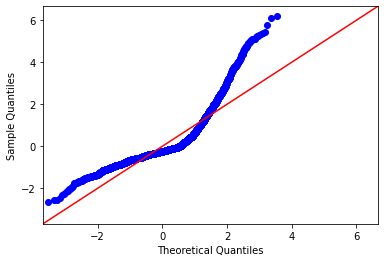

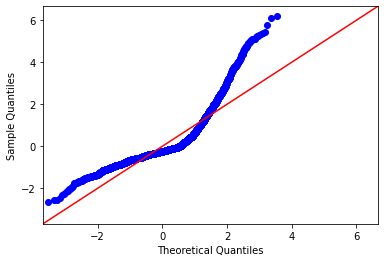

In [193]:
sm.qqplot(res.resid,fit=True,line='45')

(array([  19.,  486., 3176.,  835.,  346.,  172.,   74.,   50.,   26.,
           6.]),
 array([-5.0763086 , -3.37163786, -1.66696713,  0.03770361,  1.74237435,
         3.44704509,  5.15171582,  6.85638656,  8.5610573 , 10.26572803,
        11.97039877]),
 <a list of 10 Patch objects>)

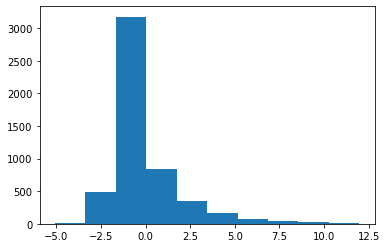

In [176]:
import matplotlib.pyplot as plt
plt.hist(res.resid)

Figure(432x288)


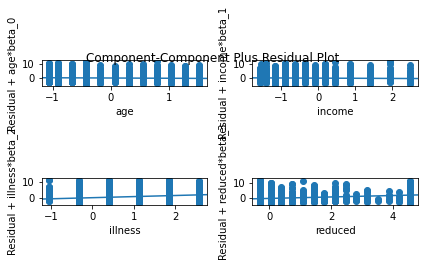

In [208]:
print(sm.graphics.plot_ccpr_grid(res))

In [211]:
y_pred = res.predict(feature_matrix)

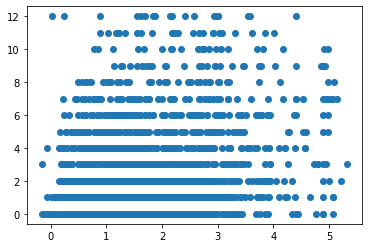

In [215]:
plt.scatter(y_pred,y)

In [216]:
X.cov()

,age,income,illness,reduced
age,1.000193,-0.271126,0.205023,0.094763
income,-0.271126,1.000193,-0.148840,-0.047554
illness,0.205023,-0.148840,1.000193,0.218158
reduced,0.094763,-0.047554,0.218158,1.000193


In [219]:
wine_df = pd.read_csv('winequality-red.csv',delimiter=';')

In [220]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [222]:
X = wine_df.iloc[:,:-1]
y = wine_df.iloc[:,-1]

In [228]:
from sklearn.model_selection import train_test_split
sc = StandardScaler()

X_std = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.25)

In [231]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)

In [235]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [237]:
from sklearn.metrics import mean_squared_error
print('Train mse:',mean_squared_error(y_train,y_train_pred))
print('Test mse:',mean_squared_error(y_test,y_test_pred))

Train mse: 0.4066230430251564
Test mse: 0.45445659827293045


In [239]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso().fit(X_train,y_train)

lasso_train_pred = lasso_reg.predict(X_train)
lasso_test_pred = lasso_reg.predict(X_test)

In [242]:
print('Train:',mean_squared_error(y_train,lasso_train_pred))
print('Test:',mean_squared_error(y_test,lasso_test_pred))

Train: 0.6607716605650663
Test: 0.6247683727960677


In [243]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)

ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)

print('Train:',mean_squared_error(y_train,ridge_train_pred))
print('Test:',mean_squared_error(y_test,ridge_test_pred))

Train: 0.4066233611602315
Test: 0.45431989533522626


In [250]:
from sklearn.model_selection import GridSearchCV
alpha_grid = {'alpha':[0.25,0.5,0.1,1.5,2.0,2.5]}
ridge_grid = GridSearchCV(Ridge(),alpha_grid)
lasso_grid = GridSearchCV(Lasso(),alpha_grid)
ridge_grid.fit(X_train,y_train)
lasso_grid.fit(X_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.25, 0.5, 0.1, 1.5, 2.0, 2.5]})

In [253]:
print('Ridge:',ridge_grid.best_params_)
print('Lasso:',lasso_grid.best_params_)

Ridge: {'alpha': 2.5}
Lasso: {'alpha': 0.1}
